In [7]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import math
from sklearn.metrics import roc_curve, auc

def sigmoid(z):
    h = 1.0/(1+ np.exp(-z))
    return h

def compute_tpr_fpr(theta,data,threshold_num = 100):
    nrow,ncol = data.shape
    x = np.hstack((np.array([1.0 for i in xrange(nrow)]).reshape(nrow,1),data[:,:ncol-1]))
    y = data[:,ncol-1]
    z = np.dot(x,theta)
    h = sigmoid(z)  
    h = h.reshape(1,nrow)[0]
    tprs = []
    fprs = []
    thresholds = np.linspace(0, 1,threshold_num)
    for threshold in thresholds:
        y_hat = np.where(h > threshold,1,0)    
        r1 = (y - y_hat).tolist()
        r2 = (y + y_hat).tolist()
        y_list = y.tolist()
        fpr = float(r1.count(-1))/y_list.count(0)
        tpr = float(r2.count(2))/y_list.count(1)
        tprs.append(tpr)
        fprs.append(fpr)
    return tprs,fprs

def plot_roc(tprs,fprs):
    roc_auc = auc(fprs , tprs)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fprs, tprs, 'b',label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

def logistic_test(theta,data):
    nrow,ncol = data.shape
    x = np.hstack((np.array([1.0 for i in xrange(nrow)]).reshape(nrow,1),data[:,0:ncol-1]))
    y = data[:,ncol-1]
    z = np.dot(x,theta)
    h = sigmoid(z)
    h = h.reshape(1,nrow)[0]
    predict = np.where(h > 0.5,1,0)
    accuracy = 1- sum((y-predict)**2)/nrow
    return accuracy


def plot_cost(cost):
    plt.xlabel('iteration number')
    plt.ylabel('cost value')
    plt.title('curve of cost value')
    klen = len(cost)
    leng = np.linspace(1, klen, klen)
    plt.plot(leng, cost)
    plt.show()
    
alpha = 0.005
iter_num = 2000
eplise = 0.4
ratio= 0.8
#data_logistic = pd.read_csv('http://oheum0xlq.bkt.clouddn.com/data_logistic.csv')
#print data_logistic
data_logistic = pd.read_csv('/root/Desktop/machineLearning/data_logistic.csv')

data_Array_logistic = np.array(data_logistic)
nrow,ncol = data_Array_logistic.shape
data_Array_logistic_train = data_Array_logistic[:int(nrow*ratio),:]
data_Array_logistic_test = data_Array_logistic[int(nrow*ratio):,:]


print data_Array_logistic[1]


[-1.395634  4.662541  1.      ]


In [61]:

def get_cost(y,x,theta,nrow):
    z = np.dot(x,theta)
    h = sigmoid(z)
    J = (np.sum((y-h)**2))/(2*nrow)
    return J
 
def get_ab(y,x,theta,alpha1,step,gradient_f,nrow):
    loop = 1
    while (loop > 0 ):
        theta1 = theta - alpha1  * gradient_f
        J1 = get_cost(y,x,theta1,nrow)
        #print 'loop is %s J1 is %s:' % (loop,J1)
        alpha2 = alpha1 + step
        theta2 = theta - alpha2 * gradient_f
        J2 = get_cost(y,x,theta2,nrow)
        #print 'loop is %s J2 is %s:' % (loop,J2)
        if (J1 > J2):
            step = 2 * step
        else :
            step = -2 * step
            (alpha1,alpha2) = (alpha2,alpha1)
            (J1, J2) = (J2, J1)

        alpha3 = alpha1 + step
        theta3 = theta - alpha3 * gradient_f
        J3 = get_cost(y,x,theta3,nrow)
        #print 'loop is %s J3 is %s:' % (loop,J3)
        if (J3 > J2):
            a = min(alpha1, alpha3)
            b = max(alpha1, alpha3)
            print 'loop is %s a is %s, b is %s' % (loop,a,b)
            #return a,b
        else:
            alpha1 = alpha2
            #print 'loop is %s J1 is %s:===========' % (loop,J1)
            #print 'loop is %s J2 is %s:===========' % (loop,J2)
            #print 'loop is %s J3 is %s:===========' % (loop,J3)
        loop += 1

def get_ab_simple(y,x,theta,alpha1,step,gradient_f,nrow):
    loop = 1
    theta1 = theta - alpha1 * gradient_f
    J1 = get_cost(y,x,theta1,nrow)
    #print 'loop is %s J1 is %s:' % (loop,J1)
    alpha2 = alpha1 + step
    theta2 = theta - alpha2  * gradient_f
    J2 = get_cost(y,x,theta2,nrow)
    #print 'loop is %s J2 is %s:' % (loop,J2)
    
    while (loop > 0 ):
        #print 'alpha1 is % s, J1 is %s:' %()
        if (J1 > J2):
            step = 2 * step
        else :
            step = -2 * step
            (alpha1,alpha2) = (alpha2,alpha1)
            (J1, J2) = (J2, J1)

        alpha3 = alpha1 + step
        theta3 = theta - alpha3 * gradient_f
        J3 = get_cost(y,x,theta3,nrow)
        #print 'loop is %s J3 is %s:' % (loop,J3)
        if (J3 > J2):
            a = min(alpha1, alpha3)
            b = max(alpha1, alpha3)
            #print 'simple loop is %s a is %s, b is %s' % (loop,a,b)
            return a,b
        else:
            alpha1 = alpha2
            alpha2 = alpha3
            J1 = J2
            J2 = J3
        loop += 1

def get_alpha(a,b,theta,gradient,y,x,nrow,e):
    
    while (True):
        alpha1 = 0.618 * a + 0.382 * b
        alpha2 = 0.382 * a + 0.618 * b
        theta1 = theta - alpha1 * gradient
        theta2 = theta - alpha2 * gradient
        J1 =  get_cost(y,x,theta1,nrow)
        J2 =  get_cost(y,x,theta2,nrow)
        if (J1 > J2):
            a = alpha1
        if (J1 <= J2) :
            b = alpha2
        if (np.fabs(a-b) <= e):
            alpha = (a + b)/2
            return alpha
        
    
def logistic_train_bgd(data,alpha,iter_num,eplise):
    nrow,ncol = data.shape
    x = np.hstack((np.array([1.0 for i in xrange(nrow)]).reshape(nrow,1),data[:,0:(ncol-1)]))
    y = data[:,ncol-1].reshape(nrow,1)
    theta = np.ones((ncol, 1))
    k = 0
    costJ= []
    eplises = []
    e = 0.01
    while (k < iter_num ):
        k += 1
        z = np.dot(x,theta)
        h = sigmoid(z)
        J = (np.sum((y-h)**2))/(2*nrow)
        costJ.append(J)

        #gradient_l = np.dot(np.transpose(x),y-h)
        gradient_f = -np.dot(np.transpose(x),y-h)/nrow
            ep = sum(np.fabs(gradient_f))
        eplises.append(ep)
        if (ep<= eplise):
            return theta,costJ,eplises
        
        alpha1 = 0.01
        step = 0.001
        a,b = get_ab_simple(y,x,theta,alpha1,step,gradient_f,nrow)
        alp = get_alpha(a,b,theta,gradient_f,y,x,nrow,e)
        #print 'alp',alp
        #c,d = get_ab(y,x,theta,alpha1,step,gradient_l,nrow)
        
        
        #theta= theta + alpha / nrow * gradient_l
        
        #theta= theta - alpha * gradient_f
        theta= theta - alp * gradient_f
    return theta,costJ,eplises

iter_num = 200
alpha = 0.05
eplise = 0.1
theta,costJ,eplises = logistic_train_bgd(data_Array_logistic_train,alpha,iter_num,eplise)

print theta

tprs,fprs = compute_tpr_fpr(theta,data_Array_logistic)

plot_roc(tprs,fprs)


plot_cost(costJ)

plot_cost(eplises)





UnboundLocalError: local variable 'gradient_f' referenced before assignment

[[ 11.23093283]
 [  0.59960183]
 [ -1.5119629 ]]


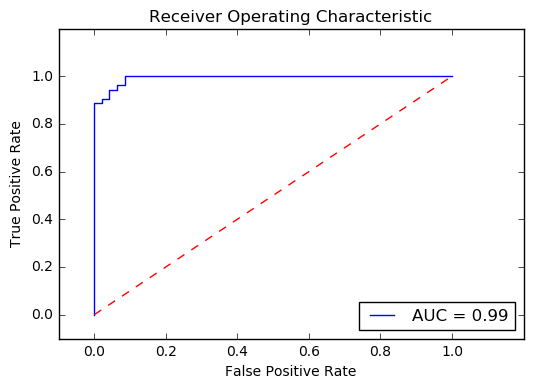

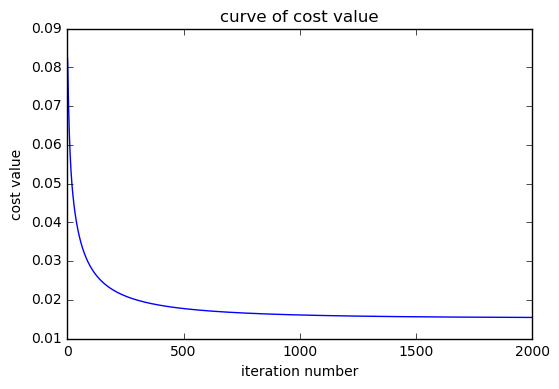

In [3]:
def logistic_train_sgd(data,alpha,iter_num):
    nrow,ncol = data.shape
    x = np.hstack((np.array([1.0 for i in xrange(nrow)]).reshape(nrow,1),data[:,0:(ncol-1)]))
    y = data[:,ncol-1].reshape(nrow,1)
    theta = np.ones((ncol, 1))
    k = 0
    costJ= []
    while (k < iter_num ):
        i = 0
        while (i < nrow):  
            x_each = x[i]
            z = np.dot(x_each,theta)
            h = sigmoid(z)
            gradient_l = x_each.reshape(3,1) * (y[i]-h)
            theta= theta + alpha * gradient_l
            i += 1
        J = (np.sum((y-sigmoid(np.dot(x,theta)).reshape(nrow,1))**2))/(2*nrow)
        costJ.append(J)  
        k += 1
    return theta,costJ

theta,costJ = logistic_train_sgd(data_Array_logistic_train,alpha,iter_num)

print theta

tprs,fprs = compute_tpr_fpr(theta,data_Array_logistic)

plot_roc(tprs,fprs)

plot_cost(costJ)

[[ 13.49396457]
 [  1.61166926]
 [ -1.91165222]]


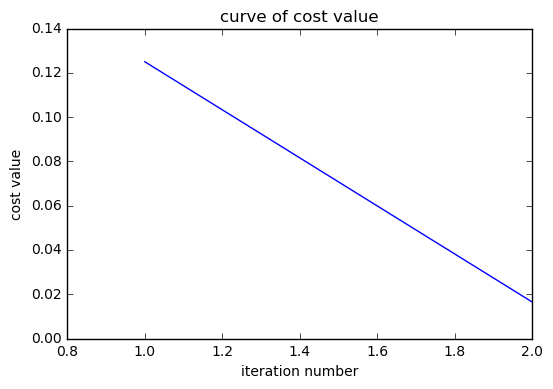

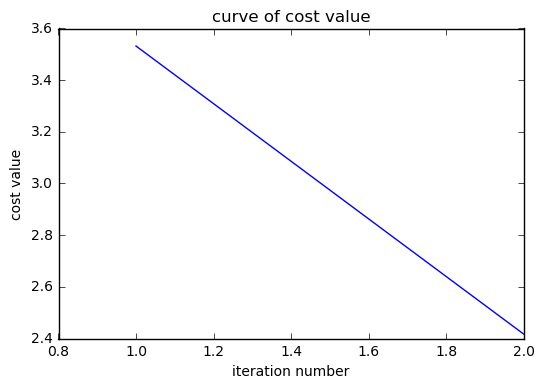

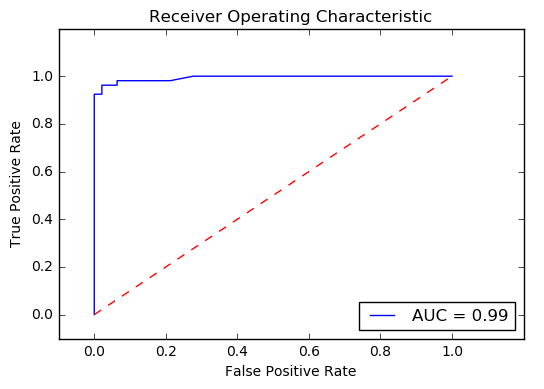

In [60]:

def get_h(x,theta,nrow): 
    z = np.dot(x,theta)
    h = sigmoid(z)
    h = h.reshape(1,nrow)[0]
    return h

def get_pk(x,h,y,nrow):
    H_f = -np.dot(h*(h-1)*np.transpose(x),x)/nrow
    gradient_f = -np.dot(np.transpose(x),y-h.reshape(nrow,1))/nrow
    pk = np.dot(np.linalg.inv(H_f),gradient_f)
    return pk

def logistic_train_ngd(data,alpha,iter_num,eplise):
    nrow,ncol = data.shape
    x = np.hstack((np.array([1.0 for i in xrange(nrow)]).reshape(nrow,1),data[:,0:(ncol-1)]))
    y = data[:,ncol-1].reshape(nrow,1)
    theta = np.zeros((ncol,1))
    k = 0
    costJ= []
    eplises = []
    alpha = 0.01
    e = 0.01
    while (k < iter_num ):

        h = get_h(x,theta,nrow)
        pk = get_pk(x,h,y,nrow)
        J = (np.sum((y-h.reshape(nrow,1))**2))/(2*nrow)
        C = np.sum(np.fabs(pk))
        eplises.append(C)
        costJ.append(J)
        if (C <= eplise):
            return theta,costJ,eplises
        
        alpha1 = 0.01
        step = 0.001
        a,b = get_ab_simple(y,x,theta,alpha1,step,pk,nrow)
        alp = get_alpha(a,b,theta,pk,y,x,nrow,e)
        #print 'alp',alp
        
        theta = theta - alp * pk
        
        k += 1      
    return theta,costJ,eplises

iter_num = 100
eplise = 2.8
theta,costJ,eplises = logistic_train_ngd(data_Array_logistic_train,alpha,iter_num,eplise)
print theta

tprs,fprs = compute_tpr_fpr(theta,data_Array_logistic)

plot_cost(costJ)

plot_cost(eplises)

plot_roc(tprs,fprs)



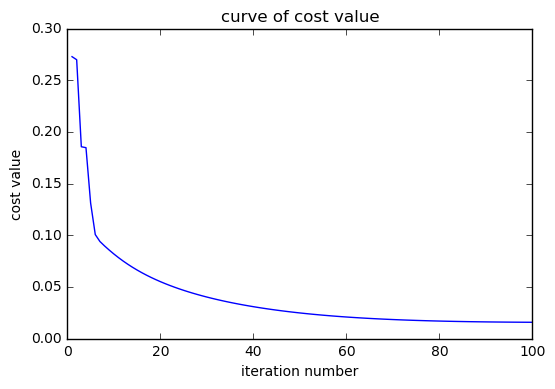

100


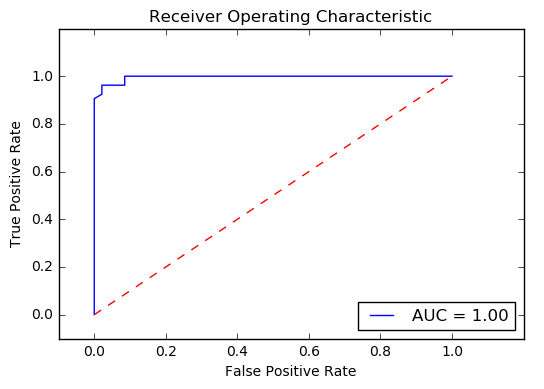

In [43]:


def logistic_DFP(data,eplise,iter_max):
    nrow,ncol = data.shape
    x = np.hstack((np.array([1.0 for i in xrange(nrow)]).reshape(nrow,1),data[:,0:(ncol-1)]))
    y = data[:,ncol-1].reshape(nrow,1)
    theta_k = np.ones((ncol, 1))
    G_k = np.eye(ncol)
    k = 0
    costJ = []
    while (k < iter_max):
        #print 'k',k
        z_k = np.dot(x,theta_k)
        h_k = sigmoid(z_k)
        g_k_f = -np.dot(np.transpose(x),y - h_k.reshape(nrow,1))/nrow
        J = (np.sum((y-h_k)**2))/(2*nrow)
        costJ.append(J)
        if (np.sum(np.fabs(g_k_f)) <= eplise) :
            return theta_k,costJ
        else :
            pk = -np.dot(G_k , g_k_f)
            theta_k1 = theta_k + alpha * pk
            z_k1 = np.dot(x,theta_k1)
            h_k1 = sigmoid(z_k1)
            g_k1_f = -np.dot(np.transpose(x),y-h_k1.reshape(nrow,1))/nrow
            sk = theta_k1 - theta_k
            yk = g_k1_f - g_k_f
            #z1 = (sk * sk') # a matrix
            z1 = np.dot(sk,np.transpose(sk))
            #z2 = (sk' * yk) # a value
            z2 = np.dot(np.transpose(sk),yk)
            #z3 = (G_k * yk * yk' * G_k) # a matrix
            z3 =  np.dot(np.dot(np.dot(G_k,yk),np.transpose(yk)),G_k)
            #z4 = (yk' * H * yk) # a value
            z4 =  np.dot(np.dot(np.transpose(yk),G_k),yk)
            G_k = G_k + z1/z2 -z3/z4
            theta_k = theta_k1
        k += 1
        
    return theta_k1,costJ

data_logistic = pd.read_csv('/root/Desktop/machineLearning/data_logistic.csv')

data_Array_logistic = np.array(data_logistic)
eplise =0.04
iter_max =100

theta,costJ = logistic_DFP(data_Array_logistic,eplise,iter_max)
plot_cost(costJ)
tprs,fprs = compute_tpr_fpr(theta,data_Array_logistic)
print len(tprs)

plot_roc(tprs,fprs)


In [ ]:

def logistic_BFGS(data,eplise,iter_max):
    nrow,ncol = data.shape
    x = np.hstack((np.array([1.0 for i in xrange(nrow)]).reshape(nrow,1),data[:,0:(ncol-1)]))
    y = data[:,ncol-1].reshape(nrow,1)
    theta_k = np.ones((ncol, 1))
    G_k = np.eye(ncol)
    k = 0
    costJ = []
    while (k < iter_max):
        z_k = np.dot(x,theta_k)
        h_k = sigmoid(z_k)
        g_k_f = -np.dot(np.transpose(x),y-h_k.reshape(nrow,1))/nrow #??
        J = (np.sum((y-sigmoid(np.dot(x,theta_k)).reshape(nrow,1))**2))/(2*nrow)
        costJ.append(J)
        if (np.sum(np.fabs(g_k_f)) <= eplise) :
            return theta_k,costJ
        else :
            pk = -np.dot(G_k , g_k_f)
            theta_k1 = theta_k + alpha * pk
            z_k1 = np.dot(x,theta_k1)
            h_k1 = sigmoid(z_k1)
            g_k1_f = -np.dot(np.transpose(x),y - h_k1.reshape(nrow,1))/nrow  #?
            if (np.sum(np.fabs(g_k1_f)) <= eplise) :
                return theta_k1,costJ
            else :
                sk = theta_k1 - theta_k
                yk = g_k1_f - g_k_f
                # z1=yk'*G_k*yk a vlaue
                z1 = np.dot(np.dot(np.transpose(yk),G_k),yk)
                # z2 = sk' * yk a value
                z2 = np.dot(np.transpose(sk),yk)
                # z3 = sk * sk' a  square matrix of ncoal dimension
                z3 =  np.dot(sk,np.transpose(sk)) 
                # z4 = sk * yk'*G_k + G_k * yk * sk'  a  square matrix of ncoal dimension
                z4 =  np.dot(np.dot(sk,np.transpose(yk)),G_k) + np.dot(np.dot(G_k,yk),np.transpose(sk))
                G_k = G_k + (1+z1/z2)*z3/z2 - z4/z2
                theta_k = theta_k1
        k += 1
    return theta_k1,costJ

theta,costJ = logistic_BFGS(data,eplise,iter_max)
print theta

plot_cost(costJ)

tprs,fprs = compute_tpr_fpr(theta,data_Array_logistic)
print len(tprs)

plot_roc(tprs,fprs)
